<a href="https://colab.research.google.com/github/akashkivani/almabetter-pythonEDA-project/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hotel Booking Analysis**

---

---




Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

0. **Importing libraries**

---



In [3]:
import numpy as np
import pandas as pd

1. **Mounting and importing the data.**

---



In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
hotel_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hotel Bookings.csv')

*Initial exploration of data.*

In [6]:
hotel_data.shape

(119390, 32)

In [7]:
# We want to see all the coloumns for better exploration, thus using following syntax.

pd.set_option('display.max_columns', None)

In [8]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Data Description**:


---


hotel : Resort Hotel / City Hotel

is_canceled:if the booking was canceled- 1 / not - 0

lead_time : No of days between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week no of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : No of weekend nigh

stays_in_weekend_nights : No of weekend nights (Saturday / Sunday) the guest stayed / booked to stay at the hotel

stays_in_week_nights : No of week nights (Monday to Friday) the guest stayed / booked to stay at the hotel

adults : No of adults

children : No of children

babies : No of babies

meal : Type of meal booked.

country : Country of origin. market_segment : Market segment designation. In categories, “TA” - “Travel Agents” and “TO” - “Tour Operators”

distribution_channel : Booking distribution channel. “TA” - “Travel Agents” and “TO” - “Tour Operators”

is_repeated_guest : tells whether the booking name was repeated guest -1 / not- 0

previous_cancellations : No of previous bookings that were cancelled by customer prior to the current booking

previous_bookings_not_canceled : No of previous bookings not cancelled by customer prior to the current booking

reserved_room_type : Code of room type reserved.

assigned_room_type : Code for the type of room assigned.

booking_changes : No of changes made between booking till moment of check-in or cancellation

deposit_type: Tells customer made a deposit to guarantee the booking.

agent : ID of the travel agency that made the booking company : ID of the company that made the booking

days_in_waiting_list : No of days the booking was in the waiting list before it got confirmed to customer

customer_type : Type of customer

adr : Average Daily Rate = sum of all lodging transactions/total number of staying nights

required_car_parking_spaces : No of car parking spaces required

total_of_special_requests : No of special requests made by customer reservation_status : Reservation last status, assuming the below categories

Canceled – customer canceled the booking

Check-Out – customer has checked in and departed also

No-Show – customer did not check-in and did inform the hotel as well

reservation_status_date : Date at which the last status was set. Can be combined with Reservation Status to get booking canceled or customer checked-out

In [9]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

*Note: There seems to be null data in:*

*   Country
*   Agent
*   company
*   Children







In [10]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


2. **Data Cleaning**

---

During data cleaning process, I will:


*   Replace all NAN, null values.
*   Drop duplicate rows(if any).



In [11]:
hotel_data.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [12]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
hotel_data_copy = hotel_data.copy()

*Agent, company and children have float data type, thus we will replace Null data type here with 0.*

In [14]:
column_nan = ['agent', 'company' , 'children']

for col in column_nan:
  hotel_data_copy[col].fillna(0,inplace = True)  #Filling all nan values with 0 in columns with float data type

In [15]:
hotel_data_copy['country'].fillna('Not available', inplace = True)

In [16]:
hotel_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
hotel_data_copy.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

*No no null values here.*

*Checking and removing duplicate.*

In [18]:
duplicate = hotel_data_copy[hotel_data_copy.duplicated()]

duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [19]:
hotel_data_copy.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [20]:
hotel_data_copy = hotel_data_copy.drop_duplicates() #Dropping the duplicate rows

In [21]:
hotel_data_copy.shape

(87396, 32)

*Noted : Rows in new hotel data copy = (False) row count for duplicate.*

3. **Exploratory Data Analysis**

---

I am going to investigate the data here to find key insight, summarize data and understand it's dstribution. I will use different graphs, visualization techniques and python codes to do it , using seaborn and matplotlib Library.

*Importing libraries:*

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

a. At first finding out what specific kind of hotel have high booking.

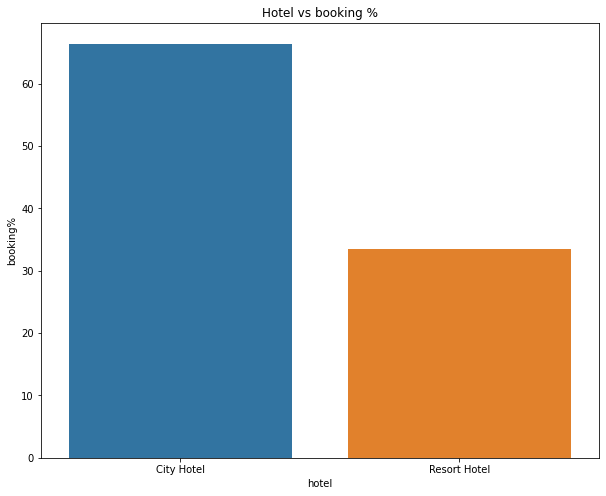

In [23]:
group_by_hotel = hotel_data.groupby('hotel')
df1 = pd.DataFrame((group_by_hotel.size()/hotel_data.shape[0])*100)
df2= df1.reset_index().rename(columns = {0:'booking%'})

#Setting size, title and plotting. 
plt.figure(figsize = (10,8))
plt.title('Hotel vs booking %')
sns.barplot(x = df2['hotel'] , y = df2['booking%'])


**Observation**: *Acc. to the graph, city hotel gets higher booking %.*


b. Cancellation rate of bookings

In [24]:
hotel_data_copy['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Cancellation vs non_cancellation')

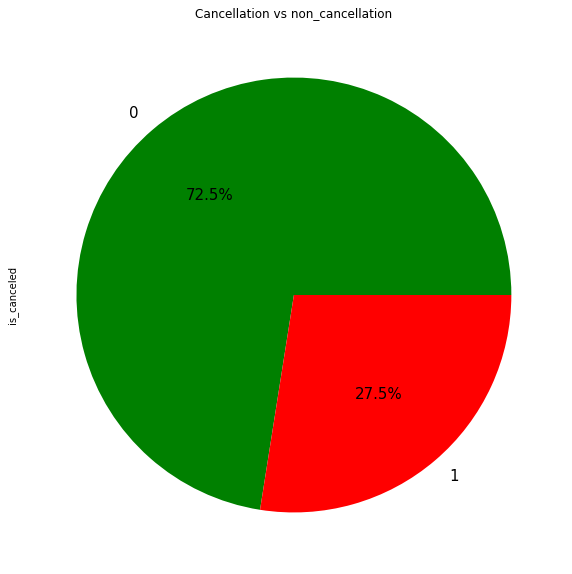

In [25]:
hotel_data_copy['is_canceled'].value_counts().plot.pie(colors = ['green' , 'red'], autopct='%1.1f%%' , figsize = (15,10), fontsize = 15)
plt.title('Cancellation vs non_cancellation')

Note that 0 here represents not cancelled, 1 represents cancelled, marked with red. 

**Observation**: 27.5% of all bookings where cancelled, i.e. more than one-fourth. 

c. ADR (Average daily rate) and Distribution channels comparsion, w.r.t. year. 

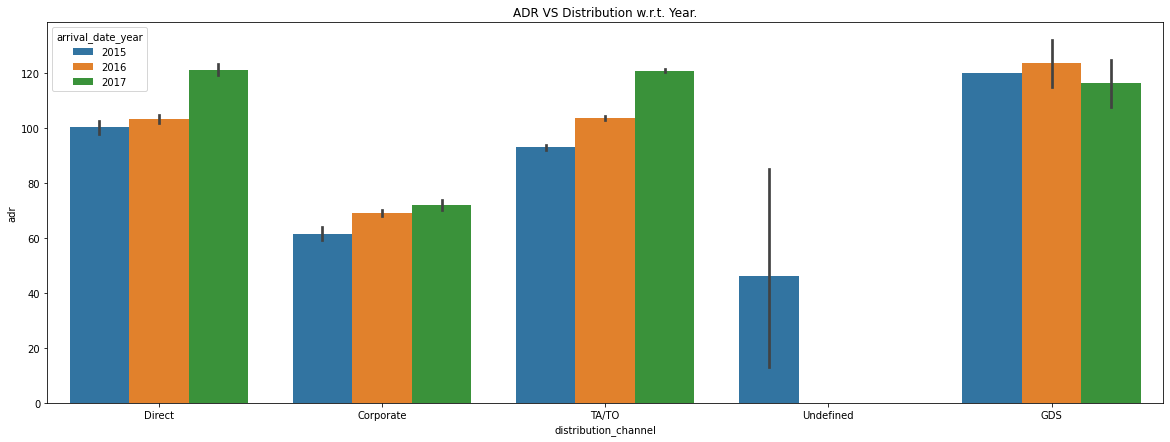

In [26]:
plt.figure(figsize = (20,7))
plt.title('ADR VS Distribution w.r.t. Year.')
sns.barplot(data = hotel_data_copy , x = 'distribution_channel' , y = 'adr' , hue = 'arrival_date_year')

**Observation**: Max adr comes from GDS while min comes from corporate. 

d. Frequency of days costumer stays in hotel.

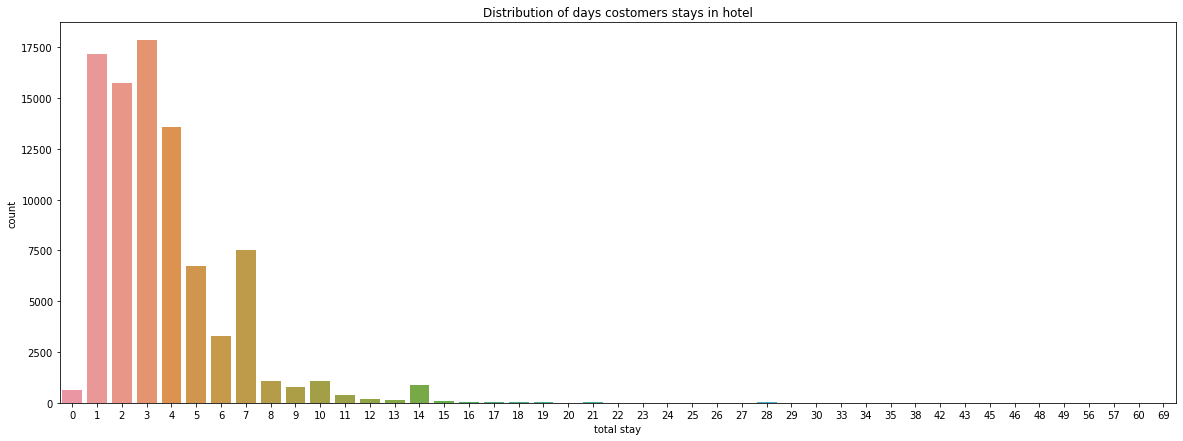

In [27]:
hotel_data_copy['total stay'] = hotel_data_copy['stays_in_weekend_nights'] + hotel_data_copy['stays_in_week_nights']

plt.figure(figsize = (20,7))
plt.title('Distribution of days costomers stays in hotel')
sns.countplot( x = hotel_data_copy['total stay'])

Observation: Most Costomers stay in hotel for 1 to 4, There are hardly some costomers who stays for more that 12 days. None stayed for more than 28 days according to past collected data.

e. ADR Mean between types of hotel.

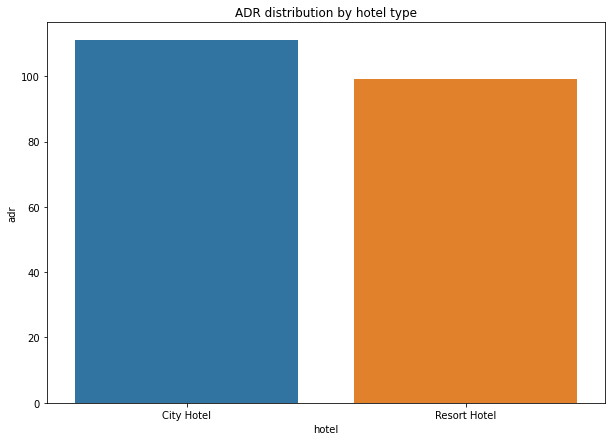

In [28]:
#group by hotel and making a df with mean of adr.
group_by_hotel = hotel_data_copy.groupby('hotel')
Mean_adr = group_by_hotel['adr'].mean().reset_index()

plt.figure(figsize = (10,7))

plt.xlabel('hotel')
plt.ylabel('adr')
plt.title('ADR distribution by hotel type')

sns.barplot(x= Mean_adr['hotel'] , y = Mean_adr['adr'])

Observation: Acc. to the graph, city adr is generating more adr on average, thus points towards better revenue

f. Costumer preference by room type.

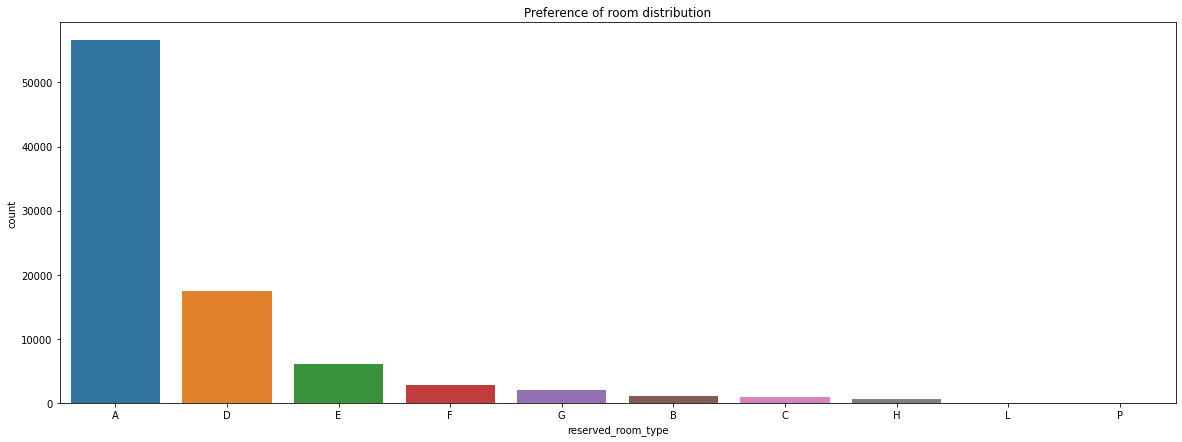

In [29]:
plt.figure(figsize = (20,7))
plt.xlabel('Room Type')
plt.ylabel('Frequency of Room booked by costumer')
plt.title("Preference of room distribution")
sns.countplot(x = hotel_data_copy['reserved_room_type'] , order= hotel_data_copy['reserved_room_type'].value_counts().index) #Plotting a count plot of reserved room type. 

Observation: Costumers are booking room type 'A' in very high number(at around 5k +), followed by D, E, F, G,B,C,H, type. According to previous data, no one prefers L and P type room.

g. Distribution of Market segement that are cancelling hotel reservation.

In [30]:
Cancelled_df = hotel_data_copy[hotel_data_copy['is_canceled'] == 1] #Making a df where cancellation is done. 
Cancelled_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total stay
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,2015-06-23,4
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,2015-05-11,7
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,2015-05-29,10


In [31]:
Cancelled_df = Cancelled_df.groupby(['market_segment' , 'hotel']).size().reset_index().rename(columns={0:'counts'})

Cancelled_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,57
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,264
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,890
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1261


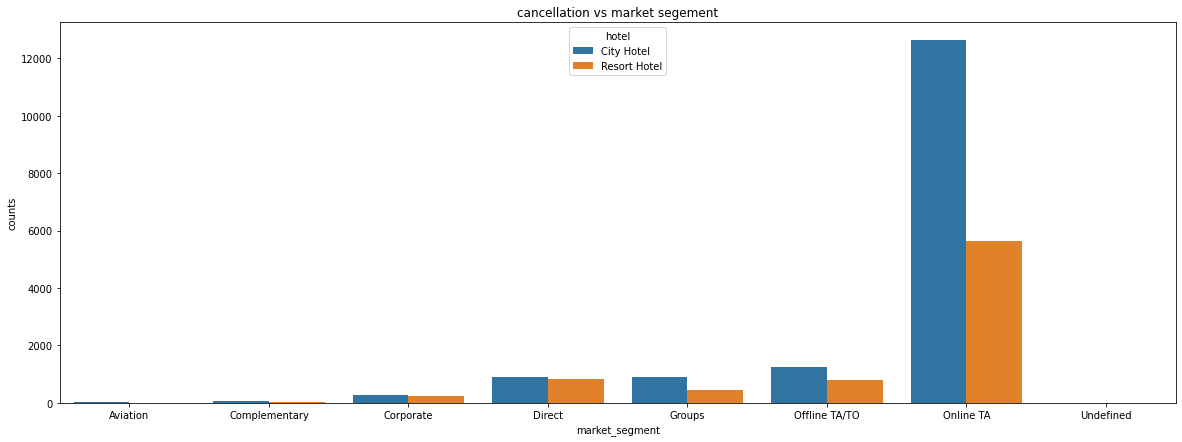

In [32]:
plt.figure(figsize=(20,7))
plt.title('cancellation vs market segement')
plt.ylabel('number of cancellation')
sns.barplot( x = 'market_segment' , y = 'counts' , hue= 'hotel' , data = Cancelled_df)

**Observation**: Online TA have highest cancellation rate, in city hotel.

h. Which meal type is most preferred. 

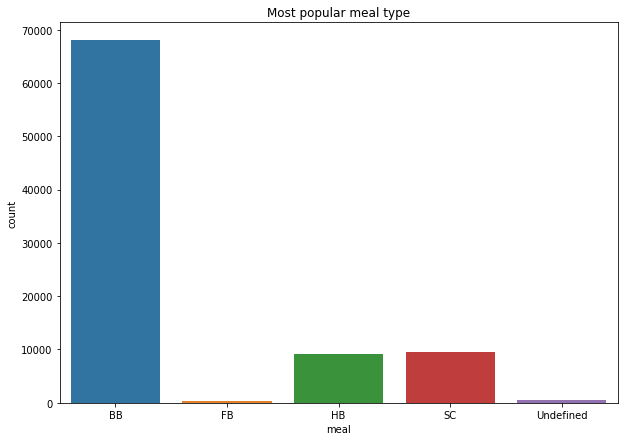

In [33]:
plt.figure(figsize = (10,7))
plt.title('Most popular meal type')

sns.countplot(x = hotel_data_copy['meal'])

Observation: BB is the most popular meal type.

i. Car parking requirement of costumers. 

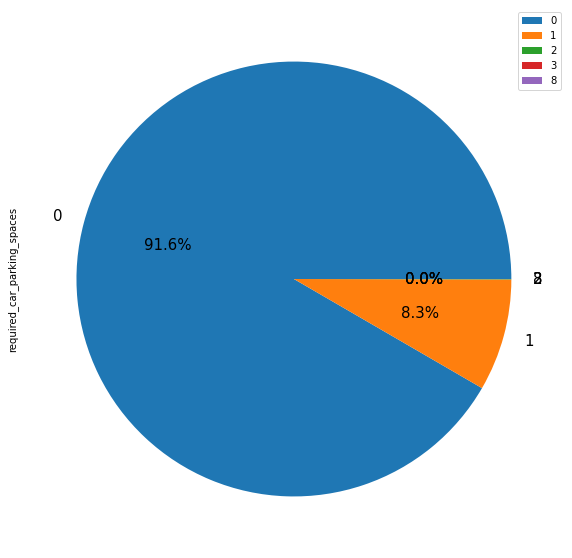

In [34]:
hotel_data_copy['required_car_parking_spaces'].value_counts().plot.pie(autopct='%1.1f%%' ,figsize = (15,10) , fontsize = 15)
plt.legend()

**Observation**: Most guests do not need parking space, while just 8.3% needs 1 parking space. 

j. Corelation between different features. 

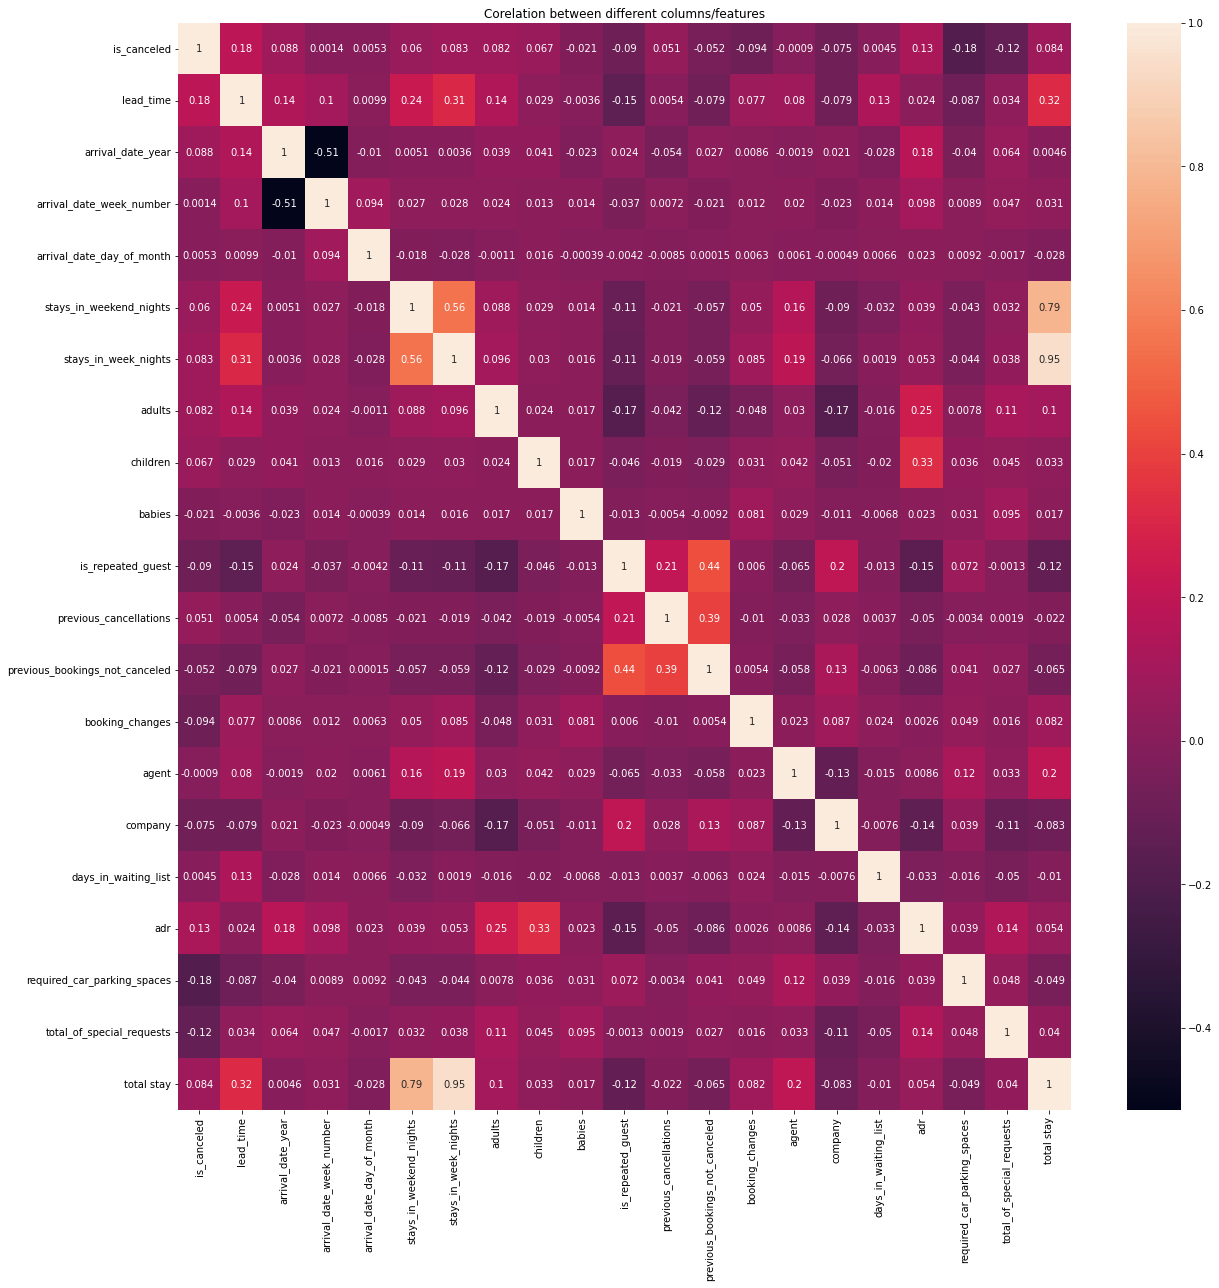

In [38]:
plt.figure(figsize =(20,20))
plt.title('Corelation between different columns/features')
sns.heatmap(hotel_data_copy.corr() , annot = True)

Observation:
1. Most column have low-corelation. 
2. Blocks with -vs are negatively corelated, for eg: previous booking cancelled and children , adults, adr, etc. It will mean that if one of them will increase, other will decrease. 
3. Blocks with +ve shows higher co-relation. Means both will increase and decrease together. 
4. For eg: children, adults & adr are positvely corelated. 
5. Previous booking not cancelled and repeated guests are corelated. 
6. Lead time and stay length also have corelation. 
7. Note that all above mentioned columns have only some co-relation. 


k. Trend of monthly bookings.

In [35]:
#Doing analysis on data frame where cancellation wasn't done. 

df_uncancelled = hotel_data_copy[hotel_data_copy['is_canceled'] == 0]
df_uncancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [36]:
#importingcalendar lib. 

import calendar

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


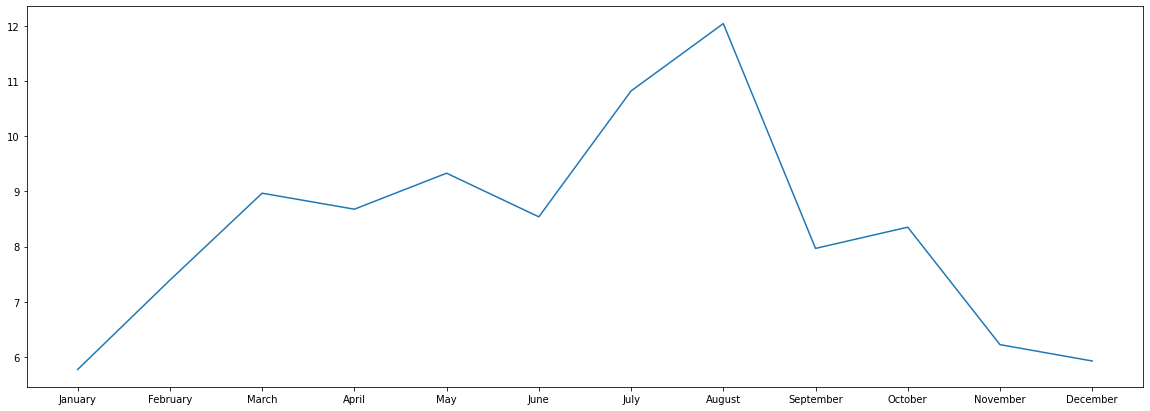

In [37]:
month_data=df_uncancelled['arrival_date_month'].value_counts().reindex(calendar.month_name[1:])
figures=plt.figure(figsize=(20,7))
x=month_data.index
y=month_data/month_data.sum()*100
sns.lineplot(x,y.values)

**Observation**: 

1.   The booking starts low, peaks and then drop again. 

2.   Highest booking is there in month of August. 

3.   In DEC. and January, booking are the lowest.

**Observations Summary**:

---



1. Max guests come to city hotel( not resort hotel).
2. 27.5% of the guests cancel the booking. 
3. GDS gives highest ADR compared to other distribution channel, thus points towards higher revenue. 
4. Most guests stay at hotel for less than 7 days. 
5. City hotel have higher adr, thus generating more revenue. 
6. Room type A is most preferred by guests. 
7. BB is most preferred meal. 
8. TA/TO has highest cancellation rate. 
9. 91.6% guests don't need parking space. 
10. Most column have low-corelation.
11. Blocks with -vs are negatively corelated, for eg: previous booking cancelled and children , adults, adr, etc. It will mean that if one of them will increase, other will decrease.
12. Blocks with +ve shows higher co-relation. Means both will increase and decrease together.
For eg: children, adults & adr are positvely corelated.
Previous booking not cancelled and repeated guests are corelated.
Lead time and stay length also have corelation.
13. Max. Booking happens July to Mid-August.

